***
## **Optimisation numérique -- M1 Math&I.A. 2023/2024 -- Université Paris-Saclay**
***

# TP 1: Minimisation de fonctionnelles quadratiques convexes

$\newcommand{\Rsp}{\mathbb{R}}
\newcommand{\nr}[1]{\|#1\|}
\newcommand{\abs}[1]{|#1|}
\newcommand{\eps}{\varepsilon}
\newcommand{\sca}[2]{\langle#1|#2\rangle}
\newcommand{\D}{\mathrm{D}}
\newcommand{\hdots}{\dots}
\newcommand{\cond}{\mathrm{cond}}$

## Préliminaires
Dans ce TP, on s'intéresse à la minimisation sur $\Rsp^N$ de fonctionnelles de la forme suivante,

$$ 
\begin{aligned}
f(x) &= \frac{1}{2} \sca{x}{Q x} + \sca{b}{x} \\
&= \frac{1}{2} \sum_{1\leq i\leq j \leq N} Q_{ij} x_i x_j + \sum_{1\leq i\leq N} b_i x_i,
\end{aligned} $$

où $Q$ est une matrice symétrique définie positive et $b$ est un vecteur colonne. Notre objectif principal est de constater numériquement un phénomène expliqué en cours, à savoir que l'efficacité des méthodes de descente de gradient dépend crucialement du *conditionnement* de la matrice $Q$ (voir ci-dessous pour une définition).

**Quelques commentaires sur les Notebook.**
Ce texte est rédigé sous la forme d'un notebook. Un notebook comporte des cellules de texte et des cellules de code, ici en Python. Quelques raccourcis clavier et remarques utiles:

- `CTRL+Entrée`: exécute la cellule de code, et affiche son résultat.
- `Tab`: Si l'on `Tab` après avoir tapé les premières lettres d'un nom de fonction, le système propose une liste de possibilités (ce qui peut permettre d'éviter des erreurs de frappe)
- `MAJ+Tab`: Affiche la documentation sur la fonction. Très utile pour ne pas se tromper sur l'ordre des paramètres. On peut voir une documentation plus complète en cliquant sur le '+'.
- `CTRL+s`: Enregistrer les modifications apportées au Notebook.
- Le symbole `[*]` à côté d'une cellule de code indique que le noyau Python est toujours en train de calculer. On peut l'interrompre via `Kernel -> Interrupt` ou le redémarrer via `Kernel -> Restart`. Le noyau Python repart alors de zéro, et il faut donc relancer les cellules antérieures à celle sur laquelle on travaillait.

Une aide complète, ainsi que la documentation de Python et Numpy, est disponible dans le menu `Aide`.

**Rappels de cours et du TD précédent.**
Ce TP ne nécessite que quelques définitions et théorème du cours et des cours précédents, que l'on rappelle ici (le théorème de convergence ci-dessous sera démontré un peu plus tard, dans un cas plus général).

> **Proposition:** Une fonction $f\in\mathcal{C}^2(\Rsp^d)$ est convexe si pour tout $x\in\Rsp^d$, $D^2 f(x)$ est une matrice symétrique positive, i.e. $\forall x\in\Rsp^d,\forall v\in \Rsp^d, \sca{v}{D^2 f(x) v} \geq 0$.

> **Proposition:** Si $f \in \mathcal{C}^1(\Rsp^d)$ est convexe, alors $x^* = \arg\min_{x\in \Rsp^d} f(x) \Longleftrightarrow \nabla f(x^*) = 0. $

> **Théorème:** Toute matrice symétrique $Q$ est diagonalisable dans une base orthonormale. En d’autres mots, il existe une matrice orthogonale P telle que $ P^TQP$
soit diagonale.

> **Définition:** On appelle *conditionnement* d'une matrice symétrique définie positive $Q\in M_N(\Rsp)$ de valeurs propres $0< \lambda_1\leq \dots \leq \lambda_N$ la quantité $\cond(Q) = \lambda_N / \lambda_1$. 

> **Théorème:** Soit $f(x) = \frac{1}{2} \sca{x}{Q x} + \sca{b}{x}$ où $Q$ est une matrice symétrique définie positive, et soient  $(x^{(k)})_{k\geq 0}$ les itérées de l'algorithme de descente de gradient à pas optimal, c'est à dire $x^{(0)} \in \Rsp^d$ et 
$$ \begin{cases}
d^{(k)} = -\nabla f(x^{(k)})\\
t^{(k)} = \arg\min_{t} f(x^{(k)} + t d^{(k)})  &\hbox{ pour $k\geq 0$}\\
x^{(k+1)} = x^{(k)} + t^{(k)} d^{(k)}.
\end{cases}
$$
alors, avec $x^* = \arg\min_x f(x)$ et $c = 1 - \cond(Q)^{-1} < 1$, on a
$$ f(x^{(k+1)}) - f(x^*) \leq c(f(x^{(k)}) - f(x^*)).$$

## I. Gradient à pas optimal en dimension $N=2$ 

Pour commencer, on commence par considérer la minimisation de la fonction $f_K:\Rsp^2\to\Rsp$ définie par $f_K(x) = \frac{1}{2}Kx_1^2 + \frac{1}{2}x_2^2$ où $K$ est une constante strictement positive.

**QI.1.** Calculer le gradient et la matrice hessienne de $f_K$, montrer que $f_K$ est convexe. Montrer que son unique minimiseur sur $\Rsp^2$ est $x^* = (0,0)$.



**QI.2.** Étant donné un point $x^{(k)} = (x_1^{(k)},x_2^{(k)}) \in \Rsp^2$ et $d^{(k)} = -\nabla f_K(x)$, calculer le pas  optimal $t^{(k)}$. 

*(Indication: On pourra utiliser la formule générale pour le pas donnée lors du TD1 (exercice 3) pour une fonction de la forme $f(x) = \frac{1}{2}\sca{x}{Qx} + \sca{b}{x}$.)*



**QI.3.** Programmer l'algorithme du gradient à pas optimal, et le tester  pour $K=2$. On arrêtera les itérations dès que $f_K(x^{(k)}) \leq f_K(x^*) + 10^{-8}$.  Tracer deux figures :
* les isovaleurs de $f_K$ (via les fonctions `numpy.meshgrid` et `plt.coutour`) ainsi que la trajectoire des itérées $(x_1^{(k)}, x_2^{(k)})_{k\geq 1}$ (via les fonctions `plt.plot`)
* l'évolution de l'erreur $\log(f(x^{(k)}) - f(x^*))$ en fonction de $k$.
Que se passe-t-il lorsque l'on change $K$ ?

(*Indication: On pourra stocker la liste des itérées $x^{(k)}$ et des valeurs $f(x^{(k)})$ dans deux listes `X` et `F`, et utiliser la fonction `X.append(...)` pour ajouter un élément à la liste `X`. Pour l'erreur, on recommande la fonction `plt.semilogy`.*)


In [1]:
# on importe les modules numpy et pyplot
import numpy as np
import matplotlib.pyplot as plt
# les deux commandes suivante paramètrent l'affichage des figures
%matplotlib inline
plt.rcParams['figure.figsize'] = [9.,6.]

# initialiser les variables K,Q, x0, fmin
K = 10.
X = [] # tableau pour stocker la liste des itérées x^k
F = [] # tableau pour stocker la liste des valeurs f(x^k)
x = np.array([1.,K]) 

# <completer>


**QI.4.** Recommencer l'expérience en choisissant $K = 10,100,500$. Calculer le taux de décroissance moyen (c'est-à-dire la moyenne de $(f_K(x^{(k+1)})-f(x^*))/(f_K(x^{(k)}) - f(x^*)$) et le comparer à la borne donnée dans le théorème de convergence rappelé en préliminaire.



In [2]:
# <completer>


## II. Gradient à pas optimal en dimension $N$

On commence par écrire l'algorithme de gradient à pas optimal pour minimiser sur   $\Rsp^N$ une fonction de la forme $$f(x) = \frac{1}{2} \sca{Q x}{x} + \sca{b}{x}$$
où $Q$ est une matrice $N\times N$ symétrique définie positive et $b\in\Rsp^N$ est un vecteur.
Lors du TD1 (exercices 2 et 3), nous avons vu que :
* $\nabla f(x) = Qx + b$, $\mathrm{D}^2 f(x) = Q$
* $f$ est convexe, et si $x^*$ est le minimiseur de $f$ sur $\Rsp^N$, alors il vérifie l'équation $\nabla f(x^*) = Qx^*+b = 0$.
* l'algorithme de descente de gradient à pas optimal s'écrit 
$$ \begin{cases}
d^{(k)} = -\nabla f(x^{(k)})\\
t^{(k)} = \frac{\sca{d^{(k)}}{d^{(k)}}}{\sca{d^{(k)}}{Qd^{(k)}}}.  &\hbox{ pour $k\geq 0$}\\
x^{(k+1)} = x^{(k)} + t^{(k)} d^{(k)}.
\end{cases}
$$

**QII.1** Programmer une fonction `gradient_optimal(Q,b,x0,err)`, prenant en argument la matrice $Q$, le vecteur $b$ et le point de départ $x^{(0)}$, qui calculera les itérées de la méthode de descente de gradient à pas optimal (cf préliminaires). De plus,
* Les itérations seront interrompues lorsque $\nr{d^{(k)}} \leq $ `err` (on pourra utiliser la fonction `np.linalg.norm`) ou dès que $k>10^6$.
* La fonction retournera le dernier point $x^{(k)}$ trouvé ainsi que deux vecteurs $E,F$ tels que $E^{(k)} = \nr{d^{(k)}}$ et $F^{(k)} = f(x^{(k)})$. 

Tester cette fonction avec une matrice $Q = A^T A + \mathrm{Id}$, où $A$ est une matrice aléatoire et $b$ est un vecteur aléatoire, pour $N=10$. On comparera la solution construite par l'algorithme de descente de gradient à la solution exacte $x^* = -Q^{-1}b$ retournée par `-np.linalg.solve(Q,b)`.


In [3]:
def gradient_optimal(Q,b,x0,err=1e-6):
    x = x0
    niter=0
    E = []
    F = []
    
    k = 0 # nombre d'itérations
    while (True): 
        k = k+1
        if k > 1e6: # maximum de 10^6 itérations
            print('erreur: nombre maximum d\'itérations atteint')
            break
        # calculer la direction de descente
        # <completer>
        # vérifier le critère d'arrêt, et quitter la boucle (avec break) s'il est vérifié
        # <completer>
        # calculer le pas de descente et mettre à jour x
        # <completer>
    E = np.array(E)
    F = np.array(F)
    return x,E,F

In [4]:
# test de la fonction gradient_optimal pour un Q,b aléatoire
N = 10
A = np.random.randn(N,N)
Q = np.dot(A.T,A)+np.eye(N,N)
b = np.random.rand(N)
# <completer>


## III. Gradient à pas optimal pour un problème de moindres carrés 

**Régression linéaire:** On possède un jeu de données constitué de points $(x_i,y_i)_{1\leq i\leq n} \in\Rsp^2$ et on cherche à trouver $(\mu_0, \mu_1) \in\Rsp^2$ minimisant la fonction 

$$ f: \mu\in\Rsp^2\mapsto \frac{1}{2} \sum_{1 \leq i \leq n} |\mu_0 + \mu_1 x_i - y_i|^2. $$

Ce problème d'optimisation peut être interprété de la manière suivante. Étant donnée une abscisse à l'origine $\mu_0$ et une  pente $\mu_1$, on peut calculer la distance euclidienne  entre la donnée $(x_i,y_i)$ et le point $(x_i,\mu_0 + \mu_1 x_i)$ qui appartient à la droite 
$\mathcal{D} = \{ (x,y) \mid y = \mu_0 + \mu_1 x\}$, soit
$$\eps_i = |\mu_0 + \mu_1 x_i - y_i|$$
Le problème d'optimisation précédent consiste à trouver une droite d'abscisse à l'origine $\mu_0$ et de pente $\mu_1$ minimisant la somme des erreurs $\eps_1^2 + \hdots + \eps_n^2$, et passant donc au plus près du jeu de données. Cette méthode a été inventée simultanément par Gauss et [Legendre](http://www.bibnum.education.fr/sites/default/files/legendre-texte.pdf).

Pour nos expériences, les points de données $(x_i,y_i)$ sont construits de la manière suivante:

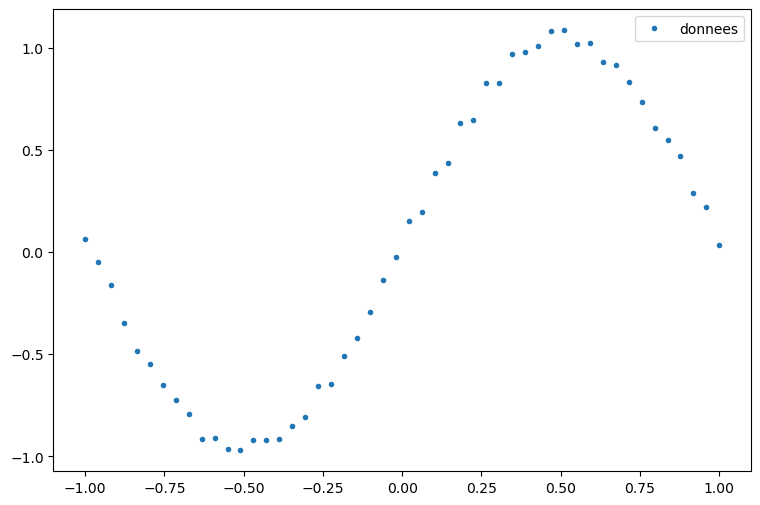

In [5]:
n=50
X = np.linspace(-1,1,n);
Y = np.sin(np.pi*X) + .1*np.random.rand(n)
plt.plot(X,Y,'.',label='donnees')
plt.legend()

**QIII.1** Construire une matrice $A$ ayant $n$ lignes et $2$ colonnes telle que le vecteur $Z := (\mu_0 + \mu_1 x_i)_{1\leq i\leq n}$ s'écrive $Z = A\mu$ (produit matrice vecteur). Remarquer que l'on peut alors écrire $f(\mu) = \frac{1}{2} \nr{A \mu - Y}^2$ où $Y = (y_i)_{1\leq i\leq n}$.


**Remarque :** Lors du TD1 (exercice 4), nous avons vu que la fonction $f(\mu) = \nr{A \mu - Y}^2$ peut être mise sous la forme $$f(\mu)=\frac{1}{2}\sca{\mu}{Q \mu} + \sca{b}{\mu} + c,$$
où $Q = A^T A$, $b = - A^T Y$ et $c = \frac{1}{2}Y^T Y$.
On a aussi montré que si la matrice $A$ injective alors $Q$ est symétrique définie positive.

**QIII.2** Calculer le minimum  $\mu^*$ de $f$ à l'aide de la fonction `gradient_optimal`, tracer sur une même figure les points $(X,Y)$ et la droite $(X, A\mu^*)$. Vérifier la correction du résultat en le comparant à celui obtenu en résolvant le système linéaire $\nabla f(\mu^*) = 0$.

In [6]:
# calculer A, Q, b, puis appliquer l'algorithme du gradient à pas optimal
# <completer>


**Régression polynômiale** On s'intéresse maintenant à une généralisation du problème de régression linéaire. Il s'agit cette fois-ci d'approcher au mieux le jeu de données $(x_i,y_i)_{1\leq i\leq n}$ par des points de la forme $(x_i,P_\mu(x_i))_{1\leq i\leq N}$ où $P_\mu(X) = \sum_{0\leq i\leq d} \mu_i X^i$ est un polynôme de degré $d$ à déterminer. L'inconnue de notre problème est donc le vecteur $\mu \in \Rsp^{d+1}$, qu'on choisit via le problème d'optimisation suivant:
$$ \min_{\mu \in \Rsp^{d+1}} \frac{1}{2} \sum_{1\leq i\leq N} \nr{P_\mu(x_i) - y_i}^2, $$

**QIII.3** Montrer que ce problème est équivalent au problème suivant:
$$ \min_{(\mu_0,\hdots,\mu_d) \in \Rsp^{d+1}} f_d(\mu) := \frac{1}{2} \nr{A_d \mu - Y}^2 \quad \hbox{ où } A_d = \begin{pmatrix} 1 & x_1 & x_1^2 & \hdots & x_1^d \\
1 & x_2 & x_2^2 & \hdots & x_2^d \\
\vdots & \vdots & \vdots & &\vdots \\
1 & x_n & x_n^2 & \hdots & x_n^d,
\end{pmatrix}$$
puis que $f_d$ est convexe et même strictement convexe si les points $x_i$ sont distincts deux à deux.




**QIII.4** Résoudre le problème d'optimisation pour $2\leq d \leq 7$ via la fonction `gradient_optimal`, en fixant `err=1e-4`. Interpréter l'accroissement du nombre d'itérations de l'algorithme en calculant le conditionnement des matrices $A_d$ via la fonction `np.linalg.cond`.

In [7]:
# on commence par construire la matrice A pour d=2, en guise d'exemple:
A = np.vstack([X**0, X**1, X**2]).T
# ou, de manière équivalente
A = np.vstack([X**i for i in range(3)]).T

# <completer>


**QIII.5** On pose $g_d(\mu) = f_d(\mu) + \frac{\gamma}{2}\sum_{0\leq i\leq d} \mu_i^2$. Mettre $g_d$ sous la forme 
$$ g_d(\mu) := \frac{1}{2} \sca{\mu}{R_d \mu} + \sca{b_d}{T} \mu + c_d $$
et démontrer que $\cond(R_d) < \cond(Q_d)$ où $Q_d:=A^T_d A_d$. Vérifier que l'algorithme du gradient à pas optimal converge plus rapidement.



In [8]:
# <completer>


## IV Exercice (valeurs propres et conditionnement)

**QIV.1** Soit $Q$ une matrice symétrique de taille $d\times d$ et $\lambda_1\leq \hdots\leq \lambda_d$ ses valeurs propres. 
Démontrer que pour tout $\mu \in \Rsp^d$, 
$$ \lambda_1 \nr{\mu}^2 \leq \sca{\mu}{Q\mu} \leq \lambda_d \nr{\mu}^2. $$
En déduire que 
$$ \lambda_1 = \min_{\mu \neq 0} \frac{\sca{\mu}{Q\mu}}{\nr{\mu}^2} \qquad 
\lambda_d = \max_{\mu \neq 0} \frac{\sca{\mu}{Q\mu}}{\nr{\mu}^2} $$



**QIV.2** On considère maintenant la matrice $Q_d = A_d^T A_d$ où $A_d$ est définie en QIII.3. 
En considérant $\mu = (1,0,\hdots,0)$ (resp. $\mu = (0,\hdots,0,1)$) 
démontrer que 
$$\lambda_d \geq n \qquad (\hbox{resp. } \lambda_1 \leq \sum_{1\leq i\leq n} x_i^{2d})$$
En déduire une minoration de $\cond(Q_d)$ ne faisant intervenir que $n$ et $d$.

